## M2 Task5:

### From EDA, we can tell that the game is fair; both sides have about the same chance to win the game at start.
### RQ1: Does the team takes the first blood has more chance to win?
### RQ2: Does the team takes the first Baron has more chance to win?(Keep in mind that many games end without first Baron)
### RQ3: Does the team takes the first dragon has more chance to win?
### RQ4: What is relationship between team KDA and chance to win?
### RQ5: What is relationship between two team's total champion damage difference and chance to win?
### RQ6: What is relationship between two team's total heal difference and chance to win?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scripts import project_functions 
df = project_functions.load_and_process('../data/raw/Master_Ranked_Games.csv')
df.head()

,duration,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,...,redTotalHeal,redObjectDamageDealt,blueKDA,redKDA,teamFirstBlood,teamFirstTower,teamFirstBaron,teamFirstDragon,teamFirstInhibitor,teamWins
0,1429,0,0,4,0,75,33,42979,41910,646,...,12916,26338,1.052632,9.142857,blue,blue,noTeam,red,noTeam,red
1,1313,0,0,3,0,45,13,36087,35880,563,...,12252,29828,0.681818,10.833333,red,blue,noTeam,red,noTeam,red
2,1660,1,1,9,2,66,31,64708,58214,651,...,17005,37066,7.000000,1.166667,red,red,blue,blue,blue,blue
3,984,2,0,5,0,55,9,45772,36545,402,...,10499,3085,20.000000,0.307692,blue,blue,noTeam,blue,noTeam,blue
4,1437,2,0,3,0,75,23,79501,42395,528,...,47523,47150,1.708333,3.263158,blue,blue,noTeam,blue,noTeam,red


Text(0, 0.5, '')

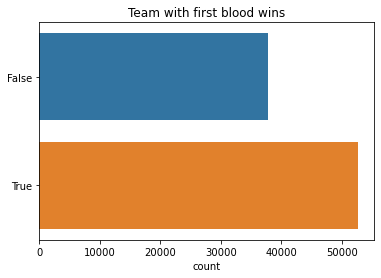

In [2]:
df1 = df.assign(temp1= lambda x: np.where(x.teamFirstBlood==x.teamWins,True,False))
sns.countplot(data=df1, y='temp1').set_title('Team with first blood wins')
plt.ylabel('')

#### Team with the first blood do have a clear more times to win the game. But the chance doesn't differ **very** much.

Text(0, 0.5, '')

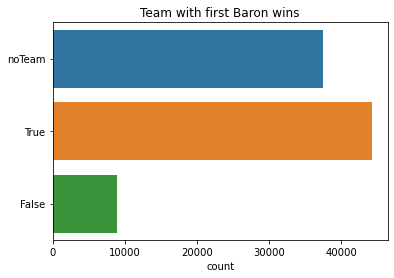

In [5]:
df2 = df.assign(temp2= lambda x: np.where((x.teamFirstBaron!='noTeam')&(x.teamFirstBaron==x.teamWins),
                                          'True',np.where((x.teamFirstBaron!='noTeam'),'False','noTeam')))
sns.countplot(data=df2, y='temp2').set_title('Team with first Baron wins')
plt.ylabel('')

#### According to the plot, if a team takes the first Baron, it is very likely to win the game. It may either because the 'better' team is easier to get first Baron or the first Baron gives that team very strong buff. But the relationship exists anyway.

Text(0, 0.5, '')

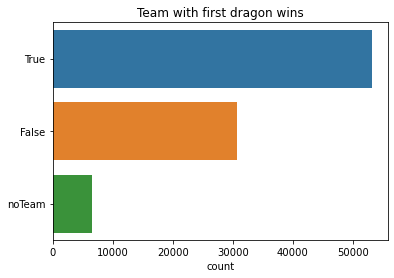

In [7]:
df3 = df.assign(temp3= lambda x: np.where((x.teamFirstDragon!='noTeam')&(x.teamFirstDragon==x.teamWins),
                                          'True',np.where((x.teamFirstDragon!='noTeam'),'False','noTeam')))
sns.countplot(data=df3, y='temp3').set_title('Team with first dragon wins')
plt.ylabel('')

#### According to the plot, if a team takes the first dragon, it is also more likely to win the game, but the chance difference is smaller than the "first Baron's." This one's is about 5.2/3 where first Baron is about 4.4/0.9 and first blood is about 5.2/3.5. 

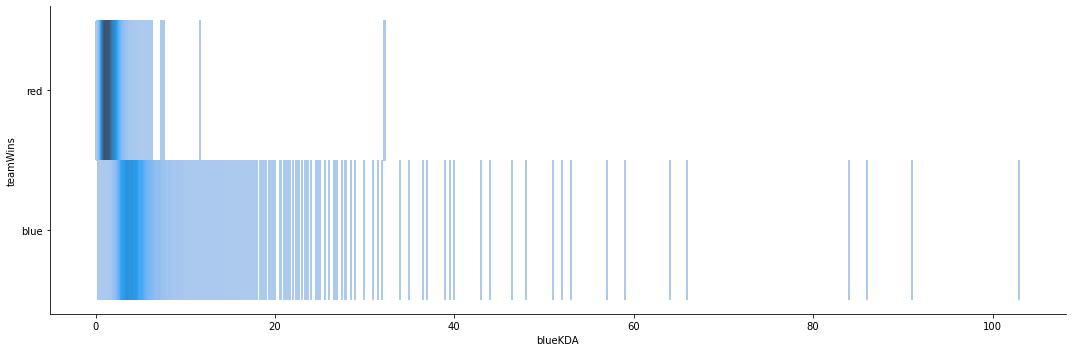

In [41]:
sns.displot(df, x="blueKDA", y="teamWins",aspect=3)

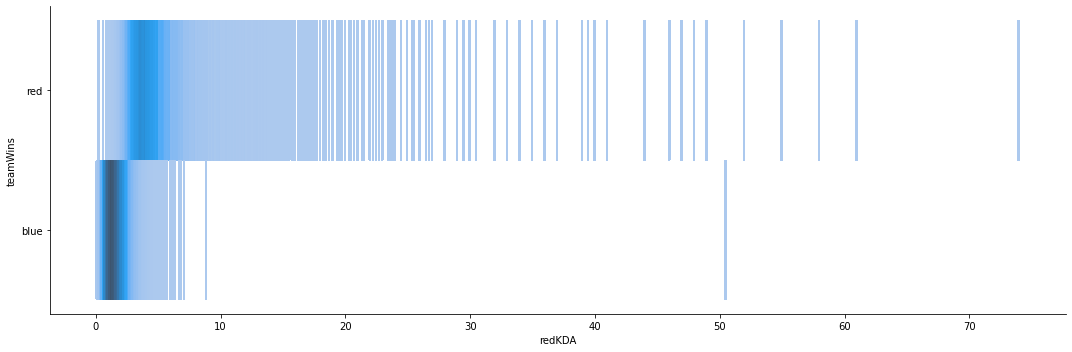

In [42]:
sns.displot(df, x="redKDA", y="teamWins",aspect=3)

#### According to the plot, as a team's KDA goes higher, that team is more likely to win. But, there are times that a team losses with high KDA(In plots, there are lines for the opposite team when the team KDA is high). Generally speaking, looking at two darkest area, those teams who win the game usually have a KDA larger than 2, ortherwise, teams are more likely to lose.

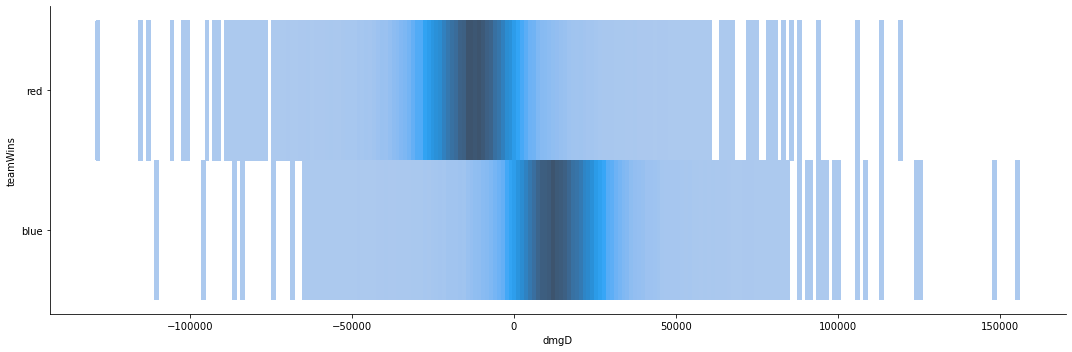

In [45]:
#We are using blue's-red's
df5 = df.assign(dmgD= df['blueChampionDamageDealt']-df['redChampionDamageDealt'])
sns.displot(df5, x="dmgD", y="teamWins",aspect=3)

#### According to the plot, the team who wins usually has higher damage than the other team(dark area). But there are also many cases that a team wins without higher damage.

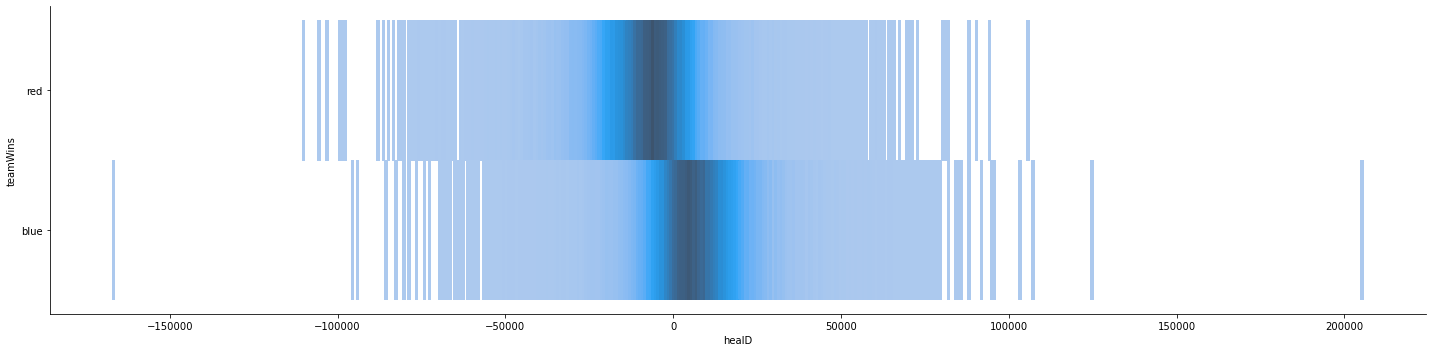

In [47]:
#We are using blue's-red's
df6 = df.assign(healD= df['blueTotalHeal']-df['redTotalHeal'])
sns.displot(df6, x="healD", y="teamWins",aspect=4)

#### According to the plot, the team who wins usually has higher heal than the other team(dark area). But there are also many cases that a team wins without higher heal. One interesting thing is that, compared with the graph of damage, heal's graph's dark areas are closer to 0, and we can make a guess that damage is more important than heal amount.